# Project : Building a Student Intervention System
## Alfred K. Hung
## November 2016

## Overview
As education has grown to rely more on technology, vast amounts of data has become available for examination and prediction. Logs of student activities, grades, interactions with teachers and fellow students, and more, are now captured in real time through learning management systems like Canvas and Edmodo. This is especially true for online classrooms, which are becoming popular even at the primary and secondary school level. Within all levels of education, there exists a push to help increase the likelihood of student success, without watering down the education or engaging in behaviors that fail to improve the underlying issues. Graduation rates are often the criteria of choice, and educators seek new ways to predict the success and failure of students early enough to stage effective interventions.

## Introduction
A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. The goal of this project is to model the factors that predict how likely a student is to pass their high school final exam by constructing an intervention system that leverages supervised learning techniques. The board of supervisors requests that the most effective model uses the least amount of computation costs to save on the budget. We'll analyze the dataset on students' performance and develop a model that will predict the likelihood that a given student will pass, quantifying whether an intervention is necessary.

This is a supervised learning classification problem. It's a binary outcome of whether a student needs early intervention or not. It predicts a discrete, categorical label not a continuous value. Separating students who need early intervention or not is about defining a decision boundary rather than a best fit line (regression) that holds continuous numbers.

## Data Exploration
The last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Descriptive Statistics
We'll investigate the dataset to determine how many students we have information on, and learn about the graduation rate among these students.

In [2]:
# Calculate number of students
n_students = student_data.shape[0]

# Calculate number of features
n_features = student_data.shape[1]-1

# Calculate passing students
n_passed = len(student_data[student_data['passed']=='yes'])

# Calculate failing students
n_failed = n_students - n_passed

# Calculate graduation rate
grad_rate = n_passed * 100. / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Data Visualization

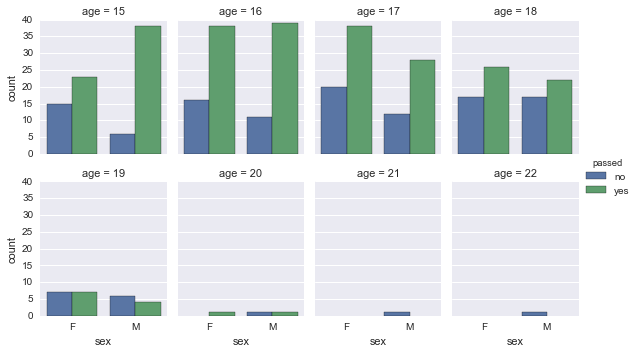

In [16]:
# On exploring the data set further, we see that for the first three plots 'age', 'failures' and 'higher' show feature boundary values that indicate when a student needs early intervention 

# Plot 1: Student count by Sex of those who Passed/Didn't Pass according to their Age
g = sns.factorplot(x="sex", col="age", hue="passed", col_wrap=4, data=student_data, kind="count", size=3.0, aspect=0.8)

The previous plot shows that as students become 19 and older they struggle to pass the high school final exam and once they get to be 21 or 22 their chances of passing are null.

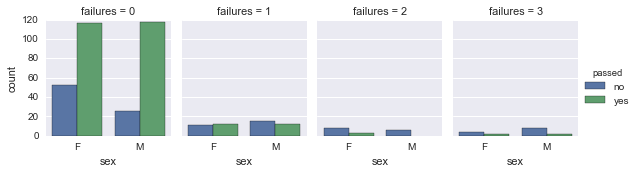

In [17]:
# Plot2: Student count by Sex of those who Passed/Didn't Pass according to their number of past class failures
g = sns.factorplot(x="sex", col="failures", hue="passed", col_wrap=4, data=student_data, kind="count", size=3.0, aspect=0.8)

In Plot 2, we observe that students have a high chance of passing if they haven't had a past class failure.  However, as they start having failures and these accumulate their chances decrease significantly.

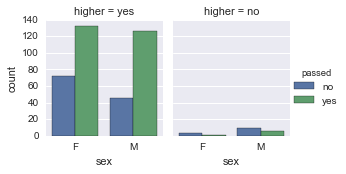

In [2]:
# Plot 3: Student count by Sex of those who Passed/Didn't Pass according to their interest to take higher education
g = sns.factorplot(x="sex", col="higher", hue="passed", col_wrap=2, data=student_data, kind="count", size=3.0

In Plot 3, students who expressed an interest to pursue higher education have a much higher chance of passing than those who don't.

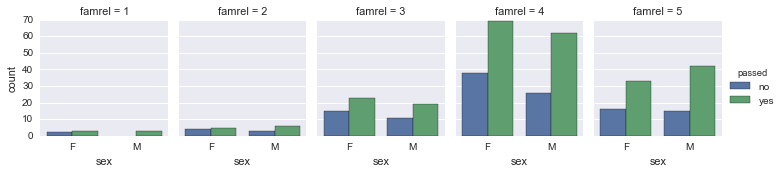

In [18]:
# The following five plots show trends in feature values.

# Plot 4: Student count by Sex of those who Passed/Didn't Pass according to their quality of family relationships (1:very bad, 5:excellent)
g = sns.factorplot(x="sex", col="famrel", hue="passed", col_wrap=5, data=student_data, kind="count", size=3.0, aspect=0.8)

In Plot 4, the graphs show that students whose family relationships are of less quality struggle more to pass as evidenced by the spread between the 'passed' the 'no-passed' bars

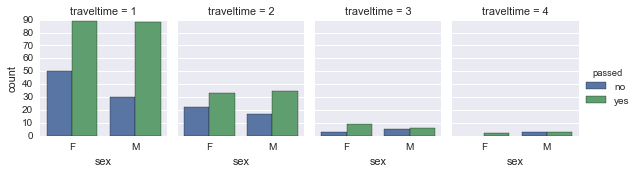

In [19]:
# Plot 5: Student count by Sex of those who Passed/Didn't Pass according to their home to school travel time (1:<15 min, 2:15-30 min, 3:0.5-1 hour, 4:>1 hour)
g = sns.factorplot(x="sex", col="traveltime", hue="passed", col_wrap=4, data=student_data, kind="count", size=3.0, aspect=0.8)

In Plot 5, the data shows that as travel time increases students struggle to pass as evidenced by the spread between the 'passed' and the 'no-passed' bars.

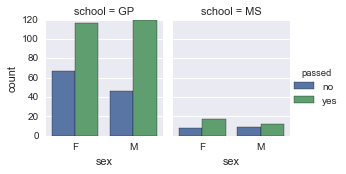

In [21]:
# Plot 6: Student count by Sex of those who Passed/Didn't Pass according to their school 
g = sns.factorplot(x="sex", col="school", hue="passed", col_wrap=2, data=student_data, kind="count", size=3.0, aspect=0.8)

Plot 6 shows that students who attend the 'GP' school have a higher chance of passing than those who attend the 'MS' school, as evidenced by the spread of the 'passed' and the 'no-passed' bars.

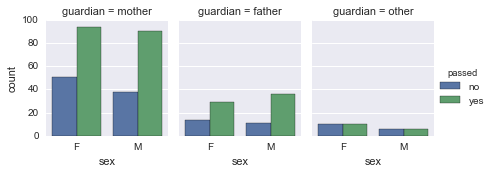

In [24]:
# Plot 7: Student count by Sex of those who Passed/Didn't Pass according to their Guardian
g = sns.factorplot(x="sex", col="guardian", hue="passed", col_wrap=3, data=student_data, kind="count", size=3.0, aspect=0.8)

Plot 7 shows that students whose guardian is their mother or father have a higher chance of passing while those whose guardian is 'other' have a harder time.  

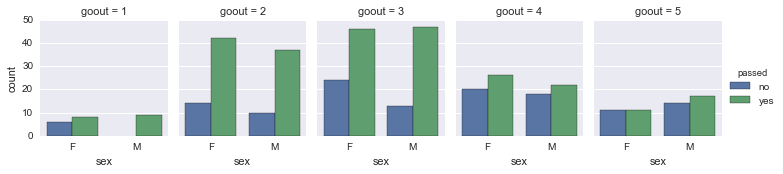

In [4]:
# Plot 8  Student count by Sex of those who Passed/Didn't Pass according to how much they go out with friends (1:very low, 5:very high)
g = sns.factorplot(x="sex", col="goout", hue="passed", col_wrap=5, data=student_data, kind="count", size=3.0, aspect=0.8)

Plot 8 shows that relationship and bonding with classmates have an influence on students' success.  Their chances of passing are greatest when their time spent with friends are 2 or 3 but become harder at 4, 1, or 5 (in that order).

## Data Preparation
In this section, we will prepare the data for modeling, training and testing. First we separate the student data into feature and target columns then we check if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

There are several non-numeric columns that need to be converted. Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other categorical columns, like `Mjob` and `Fjob`, have more than two values which we'll create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Training and Testing Data Split
We split the data (both features and corresponding labels) into training and test sets.

In [6]:
# Import additional functionality
from sklearn.cross_validation import StratifiedShuffleSplit
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points
rs = 70
sss = StratifiedShuffleSplit(y_all, n_iter=1, test_size=num_test, random_state=rs)
for train_index, test_index in sss:
    X_train, X_test = X_all.ix[train_index], X_all.ix[test_index]
    y_train, y_test = y_all.ix[train_index], y_all.ix[test_index]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, we will evaluate 3 supervised learning models that are appropriate for the data and discuss each model's strengths and weaknesses. Then we'll fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. We'll produce three tables, one for each model, that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Model Comparison and Analysis

a) Three supervised learning models that are appropriate for this problem:

- Gaussian Naive Bayes (GaussianNB) 
- Support Vector Machines (SVM)
- Logistic Regression

b) Real-world application in industry where the model can be applied:

- Gaussian Naive Bayes (GaussianNB) : Classification of documents according to subject, author or type for use in a library. 
Reference: https://en.wikipedia.org/wiki/Document_classification

- Support Vector Machines (SVM) : Text categorization for social media. Using SVM, documents can be classified into a fixed number of predefined categories, for example, type of news stories and information search on the internet. 
Reference: http://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf

- Logistic Regression : Win/Lose outcome of a political election. With logistic regression, the feature variables are linear predictors of the target variable.  The target output is a binary Win or Lose which depend upon the combination of independent feature variables such as the amount of money spent on the campaign, the amount of time spent campaigning negatively and whether or not the candidate is an incumbent. 
Reference: http://www.ats.ucla.edu/stat/stata/dae/logit.htm

c)   Strengths of each model:

**Gaussian Naive Bayes (GaussianNB) **
- It's fast to train and to classify
- It's not sensitive to irrelevant features
- It handles real and discrete data well
- It only requires a small amount of training data to estimate the parameters necessary for classification
- It works well with classes overlapping
- It works even if there are clear known relationships between attributes

**Support Vector Machines (SVM)**
- It can create non-linear decision boundaries using the kernel trick
- It works well with clear margins of separation. However, it is still useful for both linearly separable (hard margin) and non-linearly separable (soft margin) data by tweaking the C parameter.
- It is effective in high dimensional spaces, even in cases where the number of dimensions is greater than the number of samples.
- It is memory efficient by using a subset of training points in the decision function (support vectors)

**Logistic Regression**
- It's a fast algorithm
- It does not need a linear relationship between the dependent and independent variables, however, it requires that the independent variables are linearly related to the log odds
- It has low variance and less prone to overfitting
- The independent variables do not need to be interval or ratio scaled
- The dependent variable doesn’t need to be normally distributed
- Independent variables don’t have to be normally distributed or have equal variance in each group
- Independent features can be either continuous or categorical
- There should be no high intercorrelations among the predictors
- Output variable should have mutually exclusive and exhaustive categories
- It works better if there's a single decision boundary

d)   Weaknesses of each model:

**Gaussian Naive Bayes (GaussianNB) **
- It assumes independence of features
- It may not work well if the decision boundary is not linear, not elliptic, not parabolic.
- Naive Bayes cannot pick the best features
- In classification tasks it's better to have a big data set in order to make reliable estimations of the probability of each class or precision and recall could be low
- When there are no occurrences of a class label the frequency-based probability estimate will be zero

**Support Vector Machines (SVM)**
- It doesn’t perform well with large data sets because the required training time is higher
- It doesn’t perform well with lots of noise, that is, when target classes are overlapping
- SVM doesn’t directly provide probability estimates. These are calculated using five-fold cross-validation
- It can overfit

**Logistic Regression**
- If the wrong independent variables are included in the model, it will have little to no predictive value
- Logistic regression requires that each data point be independent of all other data points
- The model can appear to have more predictive power than it actually does as a result of sampling bias
- It requires a large sample size. Since Logistic Regression uses maximum likelihood estimate, the model needs at least 10 cases per independent variable

e)Characteristics of the data:
- This is an imbalanced data set since the number of students who passed (67%) is many more than the ones who didn't pass
- The data set of 395 is less than 100,000 observations which makes it small for machine learning.  However, statistically speaking, a size above 30 is considered a good number and passes requirements for all three chosen classifiers 
- The training data size of 300 is large enough for the number of features (30 or 10%)
- Of the 30 features, only two are continuous, ordinal ('age' and 'absences') while the rest are categorical
- Some features seem to be irrelevant (eg. reason, famsize, romantic) at predicting passing the final exam
- A few features seem to have a certain degree of correlation (eg. goout and freetime)
- Little or no noise. Only feature with possible outliers is 'absences'
- There seems to be a linear relationship between many independent variables (eg. travel time, quality of family relationship)and the outcome 

f) Appropriateness of each model for the problem:

**Gaussian Naive Bayes (GaussianNB) **
- It's a fast algorithm, as required by the school district
- There are features that may be irrelevant (eg. parent's cohabitation status, family size) which NB can handle
- It works with a small data set
- It works even if features have some dependency
- It's among the higher accuracy models (F1 = 0.7746, 100 data size)

**Support Vector Machines (SVM)**
- It's a fast algorithm with a small data set such as this one
- It's a non-linear classifier appropriate for this high dimensional data set
- It works well with little noise
- It supports class weight for unbalanced data sets
- It's easier to explain to the school board
- It's among the higher accuracy models (F1 = 0.8108, 200 data size)

**Logistic Regression**
- There are some linear relationships between dependent and independent variables in this student data set
- Independent features are either continuous or categorical
- It's a fast algorithm
- Each data point is independent of each other
- It supports class weight for unbalanced data sets
- It's easy to explain to the school board
- It's among the higher accuracy models (F1 = 0.7794, 300 data size)

### Setup of Training and Testing Functions
We initialize three helper functions for training and testing the three supervised learning models:

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Model Performance Metrics
We will train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, we expect to have 9 different outputs below: 3 for each model using the varying training set sizes. 

In [8]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=rs)
clf_C = LogisticRegression(random_state=rs)

models = [clf_A, clf_B, clf_C]

# Set up the training set sizes
# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

# Loop through the models then through the training set sizes
for clf in models:
    print "\n{}: \n".format(clf.__class__.__name__)
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


GaussianNB: 

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8533.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7746.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8143.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7419.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8038.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7704.

SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8428.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8050.
Training a SVC using a training set size of 200. . .
Trained mod

### Tabular Results

** Classifer 1 - GaussianNB**  

| Training Set Size |      Training Time      | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0000           |         0.0000         |     0.8533       |     0.7746      |
| 200               |        0.0000           |         0.0000         |     0.8143       |     0.7419      |
| 300               |        0.0000           |         0.0000         |     0.8038       |     0.7704      |

** Classifer 2 - SVC**  

| Training Set Size |      Training Time      | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0000           |         0.0000         |      0.8428      |     0.8050      |
| 200               |        0.0000           |         0.0000         |      0.8608      |     0.8108      |
| 300               |        0.0150           |         0.0160         |      0.8615      |     0.8105      |

** Classifer 3 - LogisticRegression**  

| Training Set Size |      Training Time      | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0000           |         0.0000         |      0.8873      |     0.6825      |
| 200               |        0.0000           |         0.0000         |      0.8467      |     0.7481      |
| 300               |        0.0160           |         0.0000         |      0.8322      |     0.7794      |

## Best Model Analysis
To choose the best model to use on the student data, we will perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

Based on the experiments performed earlier, the most appropriate model based on the available data, limited resources, cost, and performance is Support Vector Classifier (SVC). 

Training and prediction times for all three models are very low and not a major consideration factor so the most important performance measure is the F1 Score (test) which helps assess future student's results and therefore assists in the achievement of a graduation rate of 95% in a decade.  SVC has the best F1 score (test) for all set sizes. Its F1 score (train) steadily improves as the train size increases while the F1 score (test) peaks at 0.8108 for a training size of 200. Without adjusting parameters, this should be the set size we should train our model.  The second best F1 score belongs to Logistic Regression (0.7794, size = 300) and afterwards to GaussianNB (0.7746, size=100). As we update SVC's training data set size in the future, training speed could go up a bit but these are one-time events which wouldn't take up much resources while prediction is going to the the most frequent task which for SVC will remain fast. 

SVC is the best model because it produces non-linear decision boundaries (higher accuracy), can handle high dimensional space (many features), uses little resources (CPU, memory, processing time, manpower) during training, is fast during prediction, and has high performance.

To illustrate how SVC works, let's look at the following example graph of a few data points with two outcomes: blue circles (doesn't need intervention) and red squares (needs intervention).  The algorithm finds a decision boundary (hyperplane) with enough margin so that it can confidently separate and classify the two group of students. This line sits right in the middle distance of the solid color circles and squares (support vectors) giving it the maximum margin between them. For more explanation please see the next section.
(ref: http://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html)

![SVC graph:](optimal-hyperplane.png)

### Best Model Explanation

To do its classification, SVC works in two stages: first it creates the model by using 300 performance data from students then secondly it makes predictions of new students.  The model is trained by looking at 30 features of students who passed and those who didn't pass and discovering the key differences between them. Counter intuitively, it doesn't look at the examples of the best students and the worst students to tell those differences since they are clear-cut, instead, it looks at the borderline examples of what makes a passing student and a non-passing student.  These are the most tenuous cases but by being able to tell apart these less-clear cases we'll be able to understand the nuances and details of what makes a borderline student pass or not.  To draw that separating line, the model finds the widest difference between them, thus guaranteeing a higher classification accuracy. This "line" does not have to be straight but it can be curvy, that is, non-linear, allowing for flexibility in its drawing and more accurate data classification.  Even with large number of features, the model can make distinctions by elevating the number of dimensions (called the kernel trick) to separate the two groups as can be seen in the following graph: (ref: http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/)

![alt text](https://rvlasveld.github.io/images/oc-svm/visualization.gif)

To do a prediction, SVC uses this decision boundary which relies on the best borderline cases (called support vectors) to do a classification.  The new student who we wish to classify is placed in the context of this boundary and it's simply a matter of seeing which side of the dividing line the student is located.  It then labels the student if he/she needs intervention or not. The ease and simplicity of SVC's prediction are what makes this model fast and efficient. 

### Model Tuning
To fine tune SVC, we use grid search with at least one important parameter tuned with at least 3 different values, using the entire training set for this. 

In [9]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Create the parameters list
parameters = {'C': [1., 10., 100., 1000.], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'], 'class_weight': [None, 'balanced']}

# Initialize the classifier
clf = SVC(random_state=rs)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
sss2 = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.25, random_state=rs)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer, cv=sss2)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0060 seconds.
Tuned model has a training F1 score of 0.8238.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8212.


### Final F<sub>1</sub> Score Analysis

The final model's training F1 score is 0.8238 which is lower than the untuned model's 0.8615. However, the final model's testing F1 score is 0.8212 which is higher than the untuned model's 0.8105. Even though the final model's F1 score for training is lower, its higher F1 testing score makes it a more generalizable model (provides better predictions) to unseen data than the untuned model (the final tuned model has C = 100.0 and gamma = 0.0001, class_weight = None).